# Working with Time Series (Total 10 Points)

1. Load the timeseries data set, and prepare the dataset by converting the variables to date-time format (hint: use date tools). (1 point)

In [1]:
# importing the required package
import pandas as pd
from statsmodels.api import tsa

# loading the data set into a Pandas DataFrame
df = pd.read_csv('cases.csv')
# converting the variables to date-time format
df["YEAR"] = pd.Index(tsa.datetools.dates_from_range('1700', '2008'))

# another alternative to convert the variables to date-time format
# df["YEAR"] = pd.to_datetime(df["YEAR"], format='%Y')
# df["Time"] = df["YEAR"].dt.time

df

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


,YEAR,YFCASES
0,1700-12-31,5.0
1,1701-12-31,11.0
2,1702-12-31,16.0
3,1703-12-31,23.0
4,1704-12-31,36.0
5,1705-12-31,58.0
6,1706-12-31,29.0
7,1707-12-31,20.0
8,1708-12-31,10.0
9,1709-12-31,8.0


2\. Plot the autocorrelation function (ACF) and partial autocorrelation function (PCF) of the cases timeseries. (1 point)

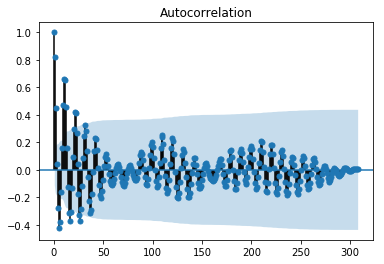

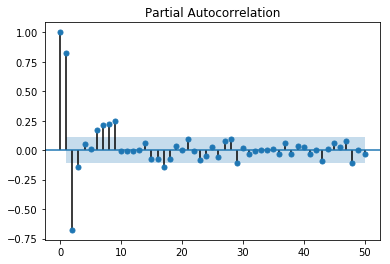

In [2]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

series = Series.from_csv('cases.csv', header=0)

plot_acf(series)
pyplot.show()

# setting lags = 50 so that the graph plot can be easily analysed
plot_pacf(series, lags=50)
pyplot.show()

3.Describe what the plots indicate (in terms of autocorrelation and autoregressive parameter (p) and moving average (q)). 2 points. Some rules of thumb to recall:
Rule 1: If the ACF shows exponential decay, the PACF has a spike at lag 1, and no correlation for other lags, then use one autoregressive (p)parameter 
Rule 2: If the ACF shows a sine-wave shape pattern or a set of exponential decays, the PACF has spikes at lags 1 and 2, and no correlation for other lags, the use two autoregressive (p) parameters. 
Rule 3: If the ACF has a spike at lag 1, no correlation for other lags, and the PACF damps out exponentially, then use one moving average (q) parameter. 
Rule 4: If the ACF has spikes at lags 1 and 2, no correlation for other lags, and the PACF has a sine-wave shape pattern or a set of exponential decays, then use two moving average (q) parameter.
Rule 5: If the ACF shows exponential decay starting at lag 1, and the PACF shows exponential decay starting at lag 1, then use one autoregressive (p) and one moving average (q) parameter.

<p>
<span style="color:blue">
The autocorrelation (ACF) plot indicates a sine-wave shape pattern with 0.00 value occuring at about 75, then 160 and finally at 300. The partial autocorrelation (PACF) plot indicates no correlation except for spikes at lags 1 amd 2. This makes the value of autoregressive (p) parameter = 2, and moving average (q) parameter = 0. This verfies Rule 2 is followed by the given daatset 'cases.csv'. This makes the model as ARMA(2,0) with two autoregressive terms and no moving averages.
</span>
</p>

4\. Another approach to assessing the presence of autocorrelation is by using the Durbin-Waton (DW) statistic. The value of the DW statistic is close to 2 if the errors are uncorrelated. What is DW for our data, and does this match what you observed from the ACF and PCF plots? (1 point)

In [3]:
from statsmodels.stats.stattools import durbin_watson
dw = durbin_watson(series)

print("Durbin Watson value : ", dw)
print()
print("The Durbin-Waston (DW) value for our data is", dw)
print("As the value is very less than 2, it indicates the presence of autocorrelation and signifies that the errors are correlated.")
print("This does match from what I observed from the ACF and PCF plots.")

Durbin Watson value :  0.13952892659903304

The Durbin-Waston (DW) value for our data is 0.13952892659903304
As the value is very less than 2, it indicates the presence of autocorrelation and signifies that the errors are correlated.
This does match from what I observed from the ACF and PCF plots.


5\. Removing serial dependency by modeling a simple ARMA process with p and q as derived above. Take a look at what the resulting process looks like (plot) (1 point)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


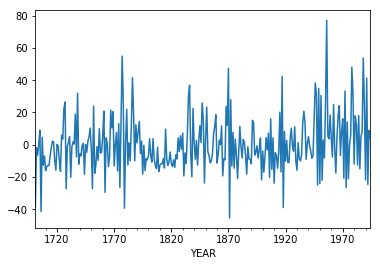

In [5]:
from statsmodels.tsa.arima_model import ARMA
from matplotlib import pyplot as plt

# slicing only the first 295 values (i.e. till the year 1994) for fitting the model,
# as I will be predicting the values from the year 1995 in question number 8.
model = ARMA(series[1:295], (2,0))
model_fit = model.fit()

residuals = model_fit.resid
residuals.plot()
plt.show()

6\. Calculate the residuals, and test the null hypothesis that the residuals come from a normal distribution, and construct a qq-plot. Do the results of the hypothesis test and qq-plot align? (1 point)

NormaltestResult(statistic=42.27883948198895, pvalue=6.595787508326759e-10)


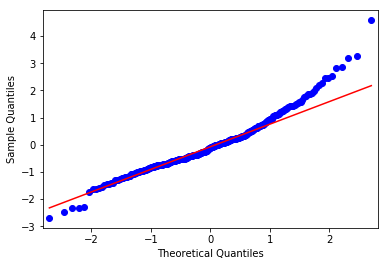

In [6]:
from scipy import stats
from statsmodels.graphics.api import qqplot

print(stats.normaltest(residuals))

fig = qqplot(residuals, line='q', fit=True)
plt.show()

<p>
<span style="color:blue">
The results from the qq-plot and hypothesis test signify that the residuals do not come from a normal distribution. This is also verfied from the qqplot by the drift in the values as they go on increasing. The pvalue which comes to be 6.59576e-10, indicating that the probability can be considered as negligible.
</span>
</p>


7\. Now investigate the autocorrelation of your ARMA(p,q) model. Did it improve?
These can be examined graphically, but a statistic will help.
Next, we calculate the lag, autocorrelation (AC), Q statistic and Prob>Q. 
The Ljung–Box Q test is a type of statistical test of whether any of a group of autocorrelations of a time series are different from zero. The null hypothesis is, H0: The data are independently distributed (i.e. the correlations in the population from which the sample is taken are 0, so that any observed correlations in the data result from randomness of the sampling process). (Hint: use qstat in tsa.acf).

In [7]:
from statsmodels.api import tsa
import numpy as np

print("Durbin Watson value :", durbin_watson(residuals))

r,q,p = tsa.acf(residuals.values.squeeze(), qstat=True)
stat = np.c_[range(1,41), r[1:], q, p]
result = pd.DataFrame(stat, columns=["lag", "autocorrelation AC", "Q statistic", "Prob(>Q)"])
result.set_index("lag")

Durbin Watson value : 2.1400598438435394


,autocorrelation AC,Q statistic,Prob(>Q)
lag,,,
1.0,-0.079049,1.855921,0.173096
2.0,0.099642,4.814867,0.090046
3.0,-0.026170,5.019684,0.170361
4.0,0.079192,6.901611,0.141180
5.0,0.045528,7.525767,0.184381
6.0,0.011039,7.562592,0.271931
7.0,0.043121,8.126410,0.321579
8.0,-0.016308,8.207329,0.413484
9.0,0.179453,18.040552,0.034706


<p>
<span style="color:blue">
The autocorrelation of the ARMA(p,q) model has improved as the value of Durbin Watson is now 2.14 which is closer to 2. This indicates that the errors are uncorrelated and there is no presence of autocorrelation in the residual data.
</span>
</p>

8\. Compute prediction for years 2009-2012 and analyze their fit against actual values. (1 point)



C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


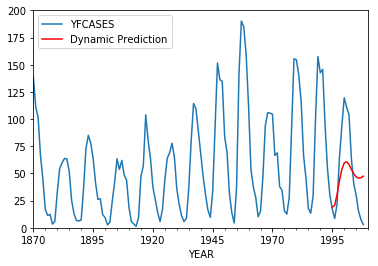

In [9]:
# predicting the values of YFCASES for the years 1995 to 2008 and fitting them against actual values from the given dataset.
pred = model_fit.predict('1995', '2008', dynamic=True)

graph = series.plot()
graph = pred.plot(ax=graph, style='r', label='Dynamic Prediction');
graph.legend()
graph.axis((-100, 40, 0, 200))

# The red color in the graph shows the predicted values from the year 1995 which is analysed
# against the actual values from the dataset (shown in blue color in the graph below)

plt.show()

9\. Calculate the forecast error via MAE and MFE. (2 points) Reminders: Mean absolute error: The mean absolute error (MAE) value is computed as the average absolute error value. If MAE is zero the forecast is perfect. As compared to the mean squared error (MSE), this measure of fit “de-emphasizes” outliers (unique or rare large error values will affect the MAE less than the MSE.

Mean Forecast Error (MFE, also known as Bias). The MFE is the average error in the observations. A large positive MFE means that the forecast is undershooting the actual observations. A large negative MFE means the forecast is overshooting the actual observations. A value near zero is ideal, and generally a small value means a pretty good fit.

The MAE is a better indicator of fit than the MFE.

In [10]:
mean_forecast_error = series.sub(pred).mean()
mean_absolute_error = np.mean((np.abs(series.sub(pred).mean()) / pred))

print("Mean Forecast Error =", mean_forecast_error)
print("Mean Absolute Error =", mean_absolute_error)

Mean Forecast Error = 4.602150393238921
Mean Absolute Error = 0.11537294319947655
